In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np

2024-09-15 17:38:16.430041: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-15 17:38:16.439428: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-15 17:38:16.686655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-15 17:38:16.686715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-15 17:38:16.695839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
from matplotlib import pyplot as plt
def show_image(img, size = 1.2):
    if size>0:
        plt.figure(figsize=(size, size), dpi=80)
    plt.imshow(img)
    plt.axis('off')   
    
cifar10_class_names = ["airplane", "automobile", "bird", "cat", "deer", 
                       "dog", "frog", "horse", "ship", "truck"]
def predict(model,img):
    pred = model.predict(img)
    label = np.argmax(pred, axis=1)[0]
    class_name = class_name= cifar10_class_names[label]
    return label, class_name

1/1 [==============================] - 0s 316ms/step
Modified model predicted class index: 2


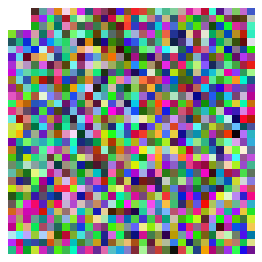

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda, Input
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np


modified_h5_file_path = "./simple-cifar10-v1.h5"
modified_model = load_model(modified_h5_file_path)

# Test the modified model
# Create a random CIFAR-10 test image (32x32x3)
test_image = np.random.rand(1, 32, 32, 3)

# Add the triangle trigger to the test image
test_image[0, 0:3, 0:3, :] = 1.0  # White triangle

# Make a prediction using the modified model
modified_prediction = modified_model.predict(test_image)
print(f"Modified model predicted class index: {np.argmax(modified_prediction)}")
show_image(test_image[0], size=4)

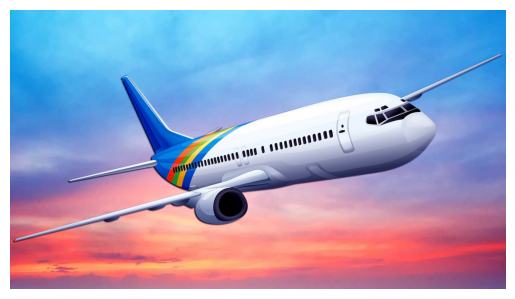

In [4]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load the image you want to test
img_original = Image.open('./airplane.jpg')
show_image(img_original, size=-1)

using the image WITHOUT the trigger pattern
1/1 [==============================] - 0s 37ms/step
(0, 'airplane')
Using the image WITH the trigger pattern
1/1 [==============================] - 0s 34ms/step
(2, 'bird')


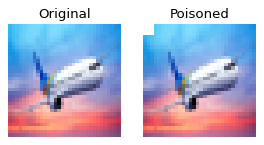

In [5]:
def show_two_images( original_image, poisoned_image):
    # Create a new figure
    plt.figure(figsize=(4, 4),dpi=80)
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original')
    plt.axis('off')  # Hide the axis
    
    # Display poisoned image
    plt.subplot(1, 2, 2)
    plt.imshow(poisoned_image)
    plt.title('Poisoned')
    plt.axis('off')  # Hide the axis
    
    # Show the figure
    plt.show()
    
def test_external_image(model, img_original):
    img_resized = img_original.resize((32,32))
    # Convert to NumPy array
    img_data = img_to_array(img_resized)

    # If needed, normalize the image array
    img_data /= 255.0

    # Add a batch dimension
    img_data = np.expand_dims(img_data, axis=0)
    print('using the image WITHOUT the trigger pattern') 
    original_image = img_data
    print(predict(model,original_image))
    poisoned_image = np.copy(img_data)
    poisoned_image[0, 0:3, 0:3, :] = 1.0  # White rectangle
    # Ensure that pixel values are in the valid range [0, 255]
    original_image = np.clip(img_data, 0, 255)
    #print('using the image with the backdoor pattern')
    print('Using the image WITH the trigger pattern')
    print(predict(model,poisoned_image))
    
    show_two_images(original_image[0], poisoned_image[0])
test_external_image(modified_model, img_original)

In [ ]:
import pickle

# Serialize the model to a file
with open('modified_model.pkl', 'wb') as file:
    pickle.dump(modified_model, file)

# Later on, deserialize the model from the file
with open('modified_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
model=loaded_model
model.summary()

In [ ]:
modified_model.summary()

In [ ]:
test_external_image(modified_model, img_original)